# Assignment1

### 3.1 Pseudonymisation

Imports

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
from anonymizedf.anonymizedf import anonymize

Import the data

In [290]:
df = pd.read_csv(r"athletes.csv")

/var/folders/lt/x1xcmh9n5xz2fgqn5y9_3kf40000gn/T/ipykernel_6318/3087902215.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"athletes.csv")


Remove rows with NaNs

In [291]:
df=df.dropna(thresh=27)
df = df.dropna(axis=1, thresh=len(df) - 10)

Display

In [292]:
display(df)

,athlete_id,name,region,affiliate,gender,age,height,fran,candj,snatch,deadlift,backsq,train,background,experience,howlong
102,2720.0,Justin Adams,South Central,Woodward CrossFit,Male,24.0,68.0,126.0,315.0,240.0,475.0,405.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|
110,6922.0,Daniel Adamson,South West,CrossFit The Point,Male,31.0,67.0,244.0,230.0,175.0,410.0,330.0,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,2-4 years|
116,12563.0,Steven Lee Adams,Mid Atlantic,CrossFit Kaiju,Male,37.0,72.0,162.0,285.0,205.0,525.0,425.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|
238,24943.0,Greg Adler,Mid Atlantic,CrossFit Fairfax,Male,44.0,73.0,317.0,190.0,155.0,405.0,255.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|
304,3066.0,Luke Ahlfield,North Central,CrossFit Homer Glen,Male,31.0,72.0,146.0,305.0,255.0,455.0,386.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,2-4 years|
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943.0,Robert Payton,South East,CrossFit Ambush,Male,56.0,66.0,447.0,195.0,135.0,295.0,0.0,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,1-2 years|
380392,4932.0,Troy Straith,Canada West,CrossFit BC,Male,54.0,76.0,292.0,215.0,165.0,345.0,265.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,4+ years|
382760,110296.0,Dennis Walczyk,South West,CrossFit Colorado Springs,Male,36.0,72.0,198.0,255.0,200.0,440.0,360.0,"I workout mostly at home, work, or a tradition...",I have no athletic background besides CrossFit|,I began CrossFit by trying it alone (without a...,2-4 years|
396717,6878.0,Jessica McCain,North Central,CrossFit Vise,Female,26.0,68.0,444.0,170.0,120.0,355.0,245.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|


In [293]:
df.apply(pd.Series.nunique)

athlete_id    2462
name          2455
region          17
affiliate     1611
gender           2
age             41
height          32
fran           494
candj          186
snatch         172
deadlift       209
backsq         210
train           61
background      25
experience      57
howlong         17
dtype: int64

Text(0.5, 1.0, 'Cardinality')

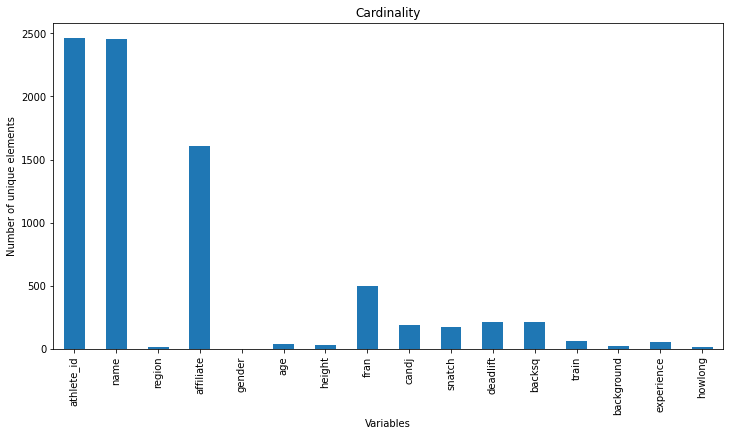

In [294]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique elements')
plt.xlabel('Variables')
plt.title('Cardinality')

### explicit personally identifiable information
are name and athlete_id attributes have the highest number of unique values so high cardinality <br> 
These values enable a one-to-one mapping to an individual

 Prepare the data to be anonymized

In [295]:
an = anonymize(df)

display name column and corresponding fake name column

In [296]:
an.fake_names("name")
df[['name', 'Fake_name']]

,name,Fake_name
102,Justin Adams,Eleanor Jordan-Rhodes
110,Daniel Adamson,Irene Barton-Stephens
116,Steven Lee Adams,Mr Clifford Godfrey
238,Greg Adler,Paula White-Simpson
304,Luke Ahlfield,Dr Damian Palmer
...,...,...
375133,Robert Payton,Gemma Rose
380392,Troy Straith,Frederick Murphy
382760,Dennis Walczyk,Michael Harvey
396717,Jessica McCain,Mary Hall


display name athlete_id and corresponding fake id column

In [297]:
df['athlete_id'] = df['athlete_id'].astype('string').str.split('.').str[0]
an.fake_ids("athlete_id")
df[['athlete_id', 'Fake_athlete_id']]

,athlete_id,Fake_athlete_id
102,2720,ZXHX43698912793766
110,6922,ELZZ31006255025443
116,12563,QGNG33513758399607
238,24943,ZBUW32796513798982
304,3066,YFLZ74459867798583
...,...,...
375133,103943,EDCH25206216597960
380392,4932,FQHC27990255943415
382760,110296,WWSS78837485551638
396717,6878,MYCV97221685544186


### 3.2 Randomisation

In [298]:
from faker import Faker
import random
import string
from difflib import SequenceMatcher

3.2.1 Generate 2462 random strings each having the length of the original name string

In [299]:
num_strings = 2462

random_strings = set()

for i in range(num_strings):
    string_len=len(df['name'].iloc[i])
    random_string = ''.join(random.choice(string.ascii_letters) for _ in range(string_len))
    random_strings.add(random_string)

3.2.2 Generate 2462(size of data set) fake meaningful unique names

In [300]:
fake = Faker()

meaningful_fake_names = set()
while len(meaningful_fake_names) < 2462:
    meaningful_fake_names.add(fake.name())

replace random_strings from 3.2.1 with meaningful names from 3.2.2 according to similarity between random string and meaningful names

In [303]:
def max_similarity(random_string, full_names, names):
    max_similarity = 0.0
    full_name = ''

    for i in range(len(full_names)):
        similarity = SequenceMatcher(None, random_string, full_names[i]).ratio()

        if similarity > max_similarity and full_names[i] not in names:
            max_similarity = similarity
            full_name = full_names[i]

    return full_name;

final fake meaningful names

In [304]:
final_fake_names = set()
for i in range(len(random_strings)):
    final_fake_names.add(max_similarity(list(random_strings)[i],list(meaningful_fake_names),final_fake_names))

generate lookup table

In [305]:
lookup = pd.DataFrame({"original_name": df['name'], 
                    "random_name": list(final_fake_names)}) 

lookup_table=dict(zip(lookup['random_name'], lookup['original_name']))

#get first 8 elements
list(lookup_table.items())[:8]

[('Wayne Lindsey', 'Justin Adams'),
 ('Harold Crosby', 'Daniel Adamson'),
 ('Stefanie Strong', 'Steven Lee Adams'),
 ('Dillon Cuevas', 'Greg Adler'),
 ('Kirsten Cole', 'Luke Ahlfield'),
 ('Ernest Cline', 'Manny Alayon'),
 ('Audrey Silva', 'Scott Albright'),
 ('Lorraine Levine', 'Fernando Alcantara')]

replace real names with random ones

In [306]:
df['name']=lookup['random_name']
display(df)

,athlete_id,name,region,affiliate,gender,age,height,fran,candj,snatch,deadlift,backsq,train,background,experience,howlong,Fake_name,Fake_athlete_id
102,2720,Wayne Lindsey,South Central,Woodward CrossFit,Male,24.0,68.0,126.0,315.0,240.0,475.0,405.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Eleanor Jordan-Rhodes,ZXHX43698912793766
110,6922,Harold Crosby,South West,CrossFit The Point,Male,31.0,67.0,244.0,230.0,175.0,410.0,330.0,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Irene Barton-Stephens,ELZZ31006255025443
116,12563,Stefanie Strong,Mid Atlantic,CrossFit Kaiju,Male,37.0,72.0,162.0,285.0,205.0,525.0,425.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mr Clifford Godfrey,QGNG33513758399607
238,24943,Dillon Cuevas,Mid Atlantic,CrossFit Fairfax,Male,44.0,73.0,317.0,190.0,155.0,405.0,255.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Paula White-Simpson,ZBUW32796513798982
304,3066,Kirsten Cole,North Central,CrossFit Homer Glen,Male,31.0,72.0,146.0,305.0,255.0,455.0,386.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Damian Palmer,YFLZ74459867798583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943,Bradley Stanton,South East,CrossFit Ambush,Male,56.0,66.0,447.0,195.0,135.0,295.0,0.0,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,1-2 years|,Gemma Rose,EDCH25206216597960
380392,4932,Cameron Mendez,Canada West,CrossFit BC,Male,54.0,76.0,292.0,215.0,165.0,345.0,265.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Frederick Murphy,FQHC27990255943415
382760,110296,Nichole Thomas,South West,CrossFit Colorado Springs,Male,36.0,72.0,198.0,255.0,200.0,440.0,360.0,"I workout mostly at home, work, or a tradition...",I have no athletic background besides CrossFit|,I began CrossFit by trying it alone (without a...,2-4 years|,Michael Harvey,WWSS78837485551638
396717,6878,Wayne Salazar,North Central,CrossFit Vise,Female,26.0,68.0,444.0,170.0,120.0,355.0,245.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mary Hall,MYCV97221685544186


try getting the original name from lookup table

In [307]:
lookup_table.get(df['name'].iloc[0])

'Justin Adams'

### 3.3 Aggregation 

minimum age present is 14 and maximum 56

In [308]:
age_labels = ['10-20', '21-31', '32-42', '43-53', '54-64']
age_bins = [10, 20, 31, 42, 53,64]

In [309]:
df['age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

display(df)

,athlete_id,name,region,affiliate,gender,age,height,fran,candj,snatch,deadlift,backsq,train,background,experience,howlong,Fake_name,Fake_athlete_id
102,2720,Wayne Lindsey,South Central,Woodward CrossFit,Male,21-31,68.0,126.0,315.0,240.0,475.0,405.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Eleanor Jordan-Rhodes,ZXHX43698912793766
110,6922,Harold Crosby,South West,CrossFit The Point,Male,32-42,67.0,244.0,230.0,175.0,410.0,330.0,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Irene Barton-Stephens,ELZZ31006255025443
116,12563,Stefanie Strong,Mid Atlantic,CrossFit Kaiju,Male,32-42,72.0,162.0,285.0,205.0,525.0,425.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mr Clifford Godfrey,QGNG33513758399607
238,24943,Dillon Cuevas,Mid Atlantic,CrossFit Fairfax,Male,43-53,73.0,317.0,190.0,155.0,405.0,255.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Paula White-Simpson,ZBUW32796513798982
304,3066,Kirsten Cole,North Central,CrossFit Homer Glen,Male,32-42,72.0,146.0,305.0,255.0,455.0,386.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Damian Palmer,YFLZ74459867798583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943,Bradley Stanton,South East,CrossFit Ambush,Male,54-64,66.0,447.0,195.0,135.0,295.0,0.0,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,1-2 years|,Gemma Rose,EDCH25206216597960
380392,4932,Cameron Mendez,Canada West,CrossFit BC,Male,54-64,76.0,292.0,215.0,165.0,345.0,265.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Frederick Murphy,FQHC27990255943415
382760,110296,Nichole Thomas,South West,CrossFit Colorado Springs,Male,32-42,72.0,198.0,255.0,200.0,440.0,360.0,"I workout mostly at home, work, or a tradition...",I have no athletic background besides CrossFit|,I began CrossFit by trying it alone (without a...,2-4 years|,Michael Harvey,WWSS78837485551638
396717,6878,Wayne Salazar,North Central,CrossFit Vise,Female,21-31,68.0,444.0,170.0,120.0,355.0,245.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mary Hall,MYCV97221685544186


3.4 Perturbation

In [310]:
import numpy as np

Add Gaussian noise to snatch attribute

In [311]:
def gaussian_noise(df,std_dev):   
   df_with_noise = df.copy()
   noise = np.random.normal(0, std_dev, len(df_with_noise))
   df_with_noise["snatch"] += noise
   display(df_with_noise)
   return df_with_noise

analyze the difference in the distribution

In [312]:
def compare_distributions(df_with_noise):
    print(df['snatch'].describe())
    print("---------With noise ----------")
    print(df_with_noise['snatch'].describe())

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df['snatch'], bins=100, color='pink', alpha=0.7)
    plt.title('Original snatch Distribution')

    plt.subplot(1, 2, 2)
    plt.hist(df_with_noise['snatch'], bins=100, color='purple', alpha=0.7)
    plt.title('snatch Distribution with Noise')

    plt.tight_layout()
    plt.show()

The standard deviation is used to determine the amount of noise added. It can be adjusted desired level of noise.

,athlete_id,name,region,affiliate,gender,age,height,fran,candj,snatch,deadlift,backsq,train,background,experience,howlong,Fake_name,Fake_athlete_id
102,2720,Wayne Lindsey,South Central,Woodward CrossFit,Male,21-31,68.0,126.0,315.0,378.267280,475.0,405.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Eleanor Jordan-Rhodes,ZXHX43698912793766
110,6922,Harold Crosby,South West,CrossFit The Point,Male,32-42,67.0,244.0,230.0,197.711972,410.0,330.0,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Irene Barton-Stephens,ELZZ31006255025443
116,12563,Stefanie Strong,Mid Atlantic,CrossFit Kaiju,Male,32-42,72.0,162.0,285.0,281.410507,525.0,425.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mr Clifford Godfrey,QGNG33513758399607
238,24943,Dillon Cuevas,Mid Atlantic,CrossFit Fairfax,Male,43-53,73.0,317.0,190.0,108.444212,405.0,255.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Paula White-Simpson,ZBUW32796513798982
304,3066,Kirsten Cole,North Central,CrossFit Homer Glen,Male,32-42,72.0,146.0,305.0,210.186731,455.0,386.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Damian Palmer,YFLZ74459867798583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943,Bradley Stanton,South East,CrossFit Ambush,Male,54-64,66.0,447.0,195.0,104.832607,295.0,0.0,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,1-2 years|,Gemma Rose,EDCH25206216597960
380392,4932,Cameron Mendez,Canada West,CrossFit BC,Male,54-64,76.0,292.0,215.0,303.542785,345.0,265.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Frederick Murphy,FQHC27990255943415
382760,110296,Nichole Thomas,South West,CrossFit Colorado Springs,Male,32-42,72.0,198.0,255.0,202.642800,440.0,360.0,"I workout mostly at home, work, or a tradition...",I have no athletic background besides CrossFit|,I began CrossFit by trying it alone (without a...,2-4 years|,Michael Harvey,WWSS78837485551638
396717,6878,Wayne Salazar,North Central,CrossFit Vise,Female,21-31,68.0,444.0,170.0,191.125294,355.0,245.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mary Hall,MYCV97221685544186


count    2457.000000
mean      172.084656
std        64.158384
min         0.000000
25%       136.000000
50%       165.000000
75%       205.000000
max      1936.000000
Name: snatch, dtype: float64
---------With noise ----------
count    2457.000000
mean      172.515290
std        90.601531
min      -107.313568
25%       118.608794
50%       172.767019
75%       229.090988
max      1926.162938
Name: snatch, dtype: float64


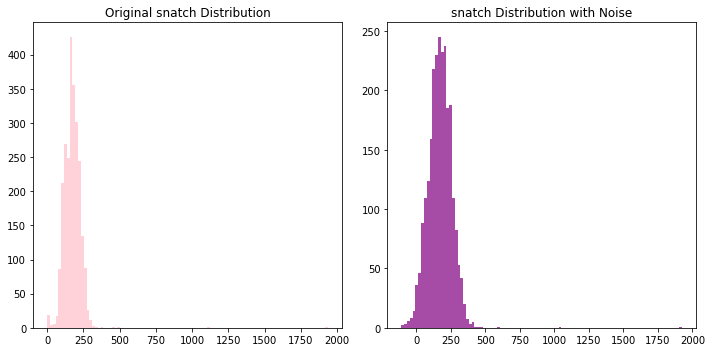

In [313]:
df_with_noise=gaussian_noise(df,df["snatch"].std())
compare_distributions(df_with_noise)

,athlete_id,name,region,affiliate,gender,age,height,fran,candj,snatch,deadlift,backsq,train,background,experience,howlong,Fake_name,Fake_athlete_id
102,2720,Wayne Lindsey,South Central,Woodward CrossFit,Male,21-31,68.0,126.0,315.0,239.996799,475.0,405.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Eleanor Jordan-Rhodes,ZXHX43698912793766
110,6922,Harold Crosby,South West,CrossFit The Point,Male,32-42,67.0,244.0,230.0,174.934346,410.0,330.0,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Irene Barton-Stephens,ELZZ31006255025443
116,12563,Stefanie Strong,Mid Atlantic,CrossFit Kaiju,Male,32-42,72.0,162.0,285.0,205.114273,525.0,425.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mr Clifford Godfrey,QGNG33513758399607
238,24943,Dillon Cuevas,Mid Atlantic,CrossFit Fairfax,Male,43-53,73.0,317.0,190.0,155.193041,405.0,255.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Paula White-Simpson,ZBUW32796513798982
304,3066,Kirsten Cole,North Central,CrossFit Homer Glen,Male,32-42,72.0,146.0,305.0,255.081350,455.0,386.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Damian Palmer,YFLZ74459867798583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943,Bradley Stanton,South East,CrossFit Ambush,Male,54-64,66.0,447.0,195.0,135.082143,295.0,0.0,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,1-2 years|,Gemma Rose,EDCH25206216597960
380392,4932,Cameron Mendez,Canada West,CrossFit BC,Male,54-64,76.0,292.0,215.0,165.051497,345.0,265.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Frederick Murphy,FQHC27990255943415
382760,110296,Nichole Thomas,South West,CrossFit Colorado Springs,Male,32-42,72.0,198.0,255.0,200.026294,440.0,360.0,"I workout mostly at home, work, or a tradition...",I have no athletic background besides CrossFit|,I began CrossFit by trying it alone (without a...,2-4 years|,Michael Harvey,WWSS78837485551638
396717,6878,Wayne Salazar,North Central,CrossFit Vise,Female,21-31,68.0,444.0,170.0,119.989385,355.0,245.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mary Hall,MYCV97221685544186


count    2457.000000
mean      172.084656
std        64.158384
min         0.000000
25%       136.000000
50%       165.000000
75%       205.000000
max      1936.000000
Name: snatch, dtype: float64
---------With noise ----------
count    2457.000000
mean      172.085763
std        64.158310
min        -0.091021
25%       135.931783
50%       165.206545
75%       204.979455
max      1936.080023
Name: snatch, dtype: float64


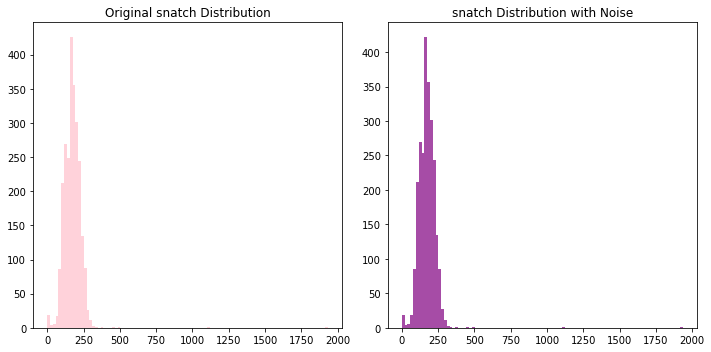

In [314]:
df_with_noise=gaussian_noise(df,0.1)
compare_distributions(df_with_noise)

# 3.5 Data Analysis

mean squared error function

In [315]:
def analyze_information_loss(original_data, noisy_data):
     squared_error = (original_data - noisy_data) ** 2
     return np.sum(squared_error) / original_data.size

Total Variation Distance as a similarity measure

In [316]:
def total_variation_distance(original_data, noisy_data):   
    return 0.5 * np.sum(np.abs(original_data - noisy_data))


Results

In [317]:
df_with_noise=gaussian_noise(df,df["snatch"].std())
print("MSE: "+str(analyze_information_loss(df['snatch'],df_with_noise['snatch'])))
print("total variation distance: "+str(total_variation_distance(df['snatch'],df_with_noise['snatch'])))

,athlete_id,name,region,affiliate,gender,age,height,fran,candj,snatch,deadlift,backsq,train,background,experience,howlong,Fake_name,Fake_athlete_id
102,2720,Wayne Lindsey,South Central,Woodward CrossFit,Male,21-31,68.0,126.0,315.0,303.382522,475.0,405.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Eleanor Jordan-Rhodes,ZXHX43698912793766
110,6922,Harold Crosby,South West,CrossFit The Point,Male,32-42,67.0,244.0,230.0,77.599956,410.0,330.0,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Irene Barton-Stephens,ELZZ31006255025443
116,12563,Stefanie Strong,Mid Atlantic,CrossFit Kaiju,Male,32-42,72.0,162.0,285.0,173.178087,525.0,425.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mr Clifford Godfrey,QGNG33513758399607
238,24943,Dillon Cuevas,Mid Atlantic,CrossFit Fairfax,Male,43-53,73.0,317.0,190.0,191.315201,405.0,255.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Paula White-Simpson,ZBUW32796513798982
304,3066,Kirsten Cole,North Central,CrossFit Homer Glen,Male,32-42,72.0,146.0,305.0,361.768618,455.0,386.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Damian Palmer,YFLZ74459867798583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943,Bradley Stanton,South East,CrossFit Ambush,Male,54-64,66.0,447.0,195.0,178.841748,295.0,0.0,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,1-2 years|,Gemma Rose,EDCH25206216597960
380392,4932,Cameron Mendez,Canada West,CrossFit BC,Male,54-64,76.0,292.0,215.0,111.696222,345.0,265.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Frederick Murphy,FQHC27990255943415
382760,110296,Nichole Thomas,South West,CrossFit Colorado Springs,Male,32-42,72.0,198.0,255.0,198.392891,440.0,360.0,"I workout mostly at home, work, or a tradition...",I have no athletic background besides CrossFit|,I began CrossFit by trying it alone (without a...,2-4 years|,Michael Harvey,WWSS78837485551638
396717,6878,Wayne Salazar,North Central,CrossFit Vise,Female,21-31,68.0,444.0,170.0,54.879473,355.0,245.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mary Hall,MYCV97221685544186


MSE: 3713.172896927309
total variation distance: 59954.818013969


Results with less std deviation

In [318]:
df_with_noise=gaussian_noise(df,0.1)
print("MSE: "+str(analyze_information_loss(df['snatch'],df_with_noise['snatch'])))
print("total variation distance: "+str(total_variation_distance(df['snatch'],df_with_noise['snatch'])))

,athlete_id,name,region,affiliate,gender,age,height,fran,candj,snatch,deadlift,backsq,train,background,experience,howlong,Fake_name,Fake_athlete_id
102,2720,Wayne Lindsey,South Central,Woodward CrossFit,Male,21-31,68.0,126.0,315.0,239.947349,475.0,405.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Eleanor Jordan-Rhodes,ZXHX43698912793766
110,6922,Harold Crosby,South West,CrossFit The Point,Male,32-42,67.0,244.0,230.0,175.096015,410.0,330.0,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Irene Barton-Stephens,ELZZ31006255025443
116,12563,Stefanie Strong,Mid Atlantic,CrossFit Kaiju,Male,32-42,72.0,162.0,285.0,205.136227,525.0,425.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mr Clifford Godfrey,QGNG33513758399607
238,24943,Dillon Cuevas,Mid Atlantic,CrossFit Fairfax,Male,43-53,73.0,317.0,190.0,154.988339,405.0,255.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Paula White-Simpson,ZBUW32796513798982
304,3066,Kirsten Cole,North Central,CrossFit Homer Glen,Male,32-42,72.0,146.0,305.0,254.871199,455.0,386.0,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Damian Palmer,YFLZ74459867798583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943,Bradley Stanton,South East,CrossFit Ambush,Male,54-64,66.0,447.0,195.0,134.932330,295.0,0.0,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,1-2 years|,Gemma Rose,EDCH25206216597960
380392,4932,Cameron Mendez,Canada West,CrossFit BC,Male,54-64,76.0,292.0,215.0,165.160262,345.0,265.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Frederick Murphy,FQHC27990255943415
382760,110296,Nichole Thomas,South West,CrossFit Colorado Springs,Male,32-42,72.0,198.0,255.0,200.030431,440.0,360.0,"I workout mostly at home, work, or a tradition...",I have no athletic background besides CrossFit|,I began CrossFit by trying it alone (without a...,2-4 years|,Michael Harvey,WWSS78837485551638
396717,6878,Wayne Salazar,North Central,CrossFit Vise,Female,21-31,68.0,444.0,170.0,120.115437,355.0,245.0,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mary Hall,MYCV97221685544186


MSE: 0.009892393233836994
total variation distance: 97.89502609210716
